## Grand Challenge: RAVIR 
### Pipeline for multiclass classification. Basic UNET with K-fold cross-validation
#### Jonas Stylbäck & Miranda Gisudden

In [1]:
# External modules
%matplotlib inline
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K

# Local modules
sys.path.append("/tf/ravir-challenge/") # Root path, change accordingly
from utils import *
from models import *

In [2]:
# Data parameters
train_dir = '/tf/ravir-challenge/dataset/train'
test_dir = '/tf/ravir-challenge/dataset/test'
img_w, img_h, img_c = 768, 768, 1
batch_size = 1
val_ratio = 0.3

# Model parameters
base = 32
optimizer = Adam
learning_rate = 1e-3
epochs = 300
metric = [multi_dice_coef]
loss_func = multi_dice_coef_loss

global model_history
model_history = []

In [3]:
# Read data
image_list = get_file_list(train_dir, 'training_images')
mask_list = get_file_list(train_dir, 'training_masks')

In [4]:
# K-fold cross-validation

k = 3

for fold in range(k):
    K.clear_session()
    
    # Load images
    train_image_list, train_mask_list, \
    val_image_list, val_mask_list = get_train_val_list_k_fold(
            image_list, mask_list, 1/3, k, fold+1)
    
    x_train = load_as_multiclass(train_image_list, img_w, img_h, img_c, 'image')
    y_train = load_as_multiclass(train_mask_list, img_w, img_h, img_c, 'mask')
    x_val = load_as_multiclass(val_image_list, img_w, img_h, img_c, 'image')
    y_val = load_as_multiclass(val_mask_list, img_w, img_h, img_c, 'mask')
    
    # Load model
    model = get_unet_MC(base, img_w, img_h, img_c)
    model_compile = model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss_func, metrics = metric)
    
    # Train model
    steps_per_epoch = x_train.shape[0]//batch_size
    train_generator = generator(x_train, y_train, batch_size)
    
    model_history.append(model.fit(
            train_generator, batch_size = batch_size, steps_per_epoch = steps_per_epoch,
            epochs = epochs, validation_steps = len(x_val), validation_data = (x_val, y_val),
            shuffle=False))
    
    if fold < 2:
        del train_image_list, train_mask_list, val_image_list, val_mask_list, x_train, y_train, x_val, y_val, model, model_compile


Model: "Basic_UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 768, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 768, 768, 32  320         ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 768, 768, 32  9248        ['conv2d[0][0]']                 
                                )                                                        

16/16 [==============================] - 6s 139ms/step - loss: -0.1058 - multi_dice_coef: 0.1058 - val_loss: -0.0998 - val_multi_dice_coef: 0.0998
Epoch 2/300
16/16 [==============================] - 2s 109ms/step - loss: -0.1049 - multi_dice_coef: 0.1049 - val_loss: -0.0978 - val_multi_dice_coef: 0.0978
Epoch 3/300
16/16 [==============================] - 2s 108ms/step - loss: -0.1138 - multi_dice_coef: 0.1138 - val_loss: -0.1306 - val_multi_dice_coef: 0.1306
Epoch 4/300
16/16 [==============================] - 2s 110ms/step - loss: -0.1440 - multi_dice_coef: 0.1440 - val_loss: -0.2197 - val_multi_dice_coef: 0.2197
Epoch 5/300
16/16 [==============================] - 2s 109ms/step - loss: -0.1280 - multi_dice_coef: 0.1280 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 6/300
16/16 [==============================] - 2s 110ms/step - loss: -0.1112 - multi_dice_coef: 0.1112 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 7/300
16/16 [==============================] - 2s 11

16/16 [==============================] - 2s 113ms/step - loss: -0.1051 - multi_dice_coef: 0.1051 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 53/300
16/16 [==============================] - 2s 118ms/step - loss: -0.1093 - multi_dice_coef: 0.1093 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 54/300
16/16 [==============================] - 2s 115ms/step - loss: -0.1121 - multi_dice_coef: 0.1121 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 55/300
16/16 [==============================] - 2s 117ms/step - loss: -0.1120 - multi_dice_coef: 0.1120 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 56/300
16/16 [==============================] - 2s 115ms/step - loss: -0.1093 - multi_dice_coef: 0.1093 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 57/300
16/16 [==============================] - 2s 116ms/step - loss: -0.1098 - multi_dice_coef: 0.1098 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 58/300
16/16 [==============================] -

16/16 [==============================] - 2s 117ms/step - loss: -0.1124 - multi_dice_coef: 0.1124 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 104/300
16/16 [==============================] - 2s 113ms/step - loss: -0.1092 - multi_dice_coef: 0.1092 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 105/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1084 - multi_dice_coef: 0.1084 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 106/300
16/16 [==============================] - 2s 113ms/step - loss: -0.1078 - multi_dice_coef: 0.1078 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 107/300
16/16 [==============================] - 2s 113ms/step - loss: -0.1081 - multi_dice_coef: 0.1081 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 108/300
16/16 [==============================] - 2s 117ms/step - loss: -0.1119 - multi_dice_coef: 0.1119 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 109/300
16/16 [===========================

Epoch 154/300
16/16 [==============================] - 2s 110ms/step - loss: -0.1100 - multi_dice_coef: 0.1100 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 155/300
16/16 [==============================] - 2s 114ms/step - loss: -0.1060 - multi_dice_coef: 0.1060 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 156/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1140 - multi_dice_coef: 0.1140 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 157/300
16/16 [==============================] - 2s 113ms/step - loss: -0.1115 - multi_dice_coef: 0.1115 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 158/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1090 - multi_dice_coef: 0.1090 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 159/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1130 - multi_dice_coef: 0.1130 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 160/300
16/16 [=============

Epoch 205/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1114 - multi_dice_coef: 0.1114 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 206/300
16/16 [==============================] - 2s 109ms/step - loss: -0.1100 - multi_dice_coef: 0.1100 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 207/300
16/16 [==============================] - 2s 115ms/step - loss: -0.1138 - multi_dice_coef: 0.1138 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 208/300
16/16 [==============================] - 2s 120ms/step - loss: -0.1127 - multi_dice_coef: 0.1127 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 209/300
16/16 [==============================] - 2s 117ms/step - loss: -0.1106 - multi_dice_coef: 0.1106 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 210/300
16/16 [==============================] - 2s 116ms/step - loss: -0.1131 - multi_dice_coef: 0.1131 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 211/300
16/16 [=============

Epoch 256/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1073 - multi_dice_coef: 0.1073 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 257/300
16/16 [==============================] - 2s 112ms/step - loss: -0.1056 - multi_dice_coef: 0.1056 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 258/300
16/16 [==============================] - 2s 115ms/step - loss: -0.1156 - multi_dice_coef: 0.1156 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 259/300
16/16 [==============================] - 2s 117ms/step - loss: -0.1082 - multi_dice_coef: 0.1082 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 260/300
16/16 [==============================] - 2s 110ms/step - loss: -0.1145 - multi_dice_coef: 0.1145 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 261/300
16/16 [==============================] - 2s 116ms/step - loss: -0.1088 - multi_dice_coef: 0.1088 - val_loss: -0.1063 - val_multi_dice_coef: 0.1063
Epoch 262/300
16/16 [=============

                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 384, 384, 32  0           ['conv2d_1[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 384, 384, 64  18496       ['max_pooling2d[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 384, 384, 64  36928       ['conv2d_2[0][0]']               
                                )                                                                 
          

Epoch 8/300
15/15 [==============================] - 2s 115ms/step - loss: -0.3264 - multi_dice_coef: 0.3264 - val_loss: -0.3487 - val_multi_dice_coef: 0.3487
Epoch 9/300
15/15 [==============================] - 2s 113ms/step - loss: -0.3286 - multi_dice_coef: 0.3286 - val_loss: -0.3699 - val_multi_dice_coef: 0.3699
Epoch 10/300
15/15 [==============================] - 2s 118ms/step - loss: -0.3337 - multi_dice_coef: 0.3337 - val_loss: -0.3262 - val_multi_dice_coef: 0.3262
Epoch 11/300
15/15 [==============================] - 2s 118ms/step - loss: -0.3333 - multi_dice_coef: 0.3333 - val_loss: -0.3640 - val_multi_dice_coef: 0.3640
Epoch 12/300
15/15 [==============================] - 2s 122ms/step - loss: -0.3206 - multi_dice_coef: 0.3206 - val_loss: -0.2966 - val_multi_dice_coef: 0.2966
Epoch 13/300
15/15 [==============================] - 2s 116ms/step - loss: -0.0406 - multi_dice_coef: 0.0406 - val_loss: -4.2245e-05 - val_multi_dice_coef: 4.2245e-05
Epoch 14/300
15/15 [==============

15/15 [==============================] - 2s 120ms/step - loss: -0.1071 - multi_dice_coef: 0.1071 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 60/300
15/15 [==============================] - 2s 114ms/step - loss: -0.1101 - multi_dice_coef: 0.1101 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 61/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1075 - multi_dice_coef: 0.1075 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 62/300
15/15 [==============================] - 2s 112ms/step - loss: -0.1063 - multi_dice_coef: 0.1063 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 63/300
15/15 [==============================] - 2s 114ms/step - loss: -0.1058 - multi_dice_coef: 0.1058 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 64/300
15/15 [==============================] - 2s 116ms/step - loss: -0.1065 - multi_dice_coef: 0.1065 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 65/300
15/15 [==============================] -

15/15 [==============================] - 2s 115ms/step - loss: -0.1068 - multi_dice_coef: 0.1068 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 111/300
15/15 [==============================] - 2s 114ms/step - loss: -0.1091 - multi_dice_coef: 0.1091 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 112/300
15/15 [==============================] - 2s 116ms/step - loss: -0.1049 - multi_dice_coef: 0.1049 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 113/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1044 - multi_dice_coef: 0.1044 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 114/300
15/15 [==============================] - 2s 114ms/step - loss: -0.1068 - multi_dice_coef: 0.1068 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 115/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1080 - multi_dice_coef: 0.1080 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 116/300
15/15 [===========================

Epoch 161/300
15/15 [==============================] - 2s 119ms/step - loss: -0.1078 - multi_dice_coef: 0.1078 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 162/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1068 - multi_dice_coef: 0.1068 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 163/300
15/15 [==============================] - 2s 115ms/step - loss: -0.1079 - multi_dice_coef: 0.1079 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 164/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1053 - multi_dice_coef: 0.1053 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 165/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1078 - multi_dice_coef: 0.1078 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 166/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1065 - multi_dice_coef: 0.1065 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 167/300
15/15 [=============

Epoch 212/300
15/15 [==============================] - 2s 112ms/step - loss: -0.1076 - multi_dice_coef: 0.1076 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 213/300
15/15 [==============================] - 2s 113ms/step - loss: -0.1094 - multi_dice_coef: 0.1094 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 214/300
15/15 [==============================] - 2s 117ms/step - loss: -0.1066 - multi_dice_coef: 0.1066 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 215/300
15/15 [==============================] - 2s 114ms/step - loss: -0.1043 - multi_dice_coef: 0.1043 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 216/300
15/15 [==============================] - 2s 115ms/step - loss: -0.1060 - multi_dice_coef: 0.1060 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 217/300
15/15 [==============================] - 2s 119ms/step - loss: -0.1099 - multi_dice_coef: 0.1099 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 218/300
15/15 [=============

Epoch 263/300
15/15 [==============================] - 2s 115ms/step - loss: -0.1048 - multi_dice_coef: 0.1048 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 264/300
15/15 [==============================] - 2s 116ms/step - loss: -0.1094 - multi_dice_coef: 0.1094 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 265/300
15/15 [==============================] - 2s 115ms/step - loss: -0.1082 - multi_dice_coef: 0.1082 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 266/300
15/15 [==============================] - 2s 119ms/step - loss: -0.1062 - multi_dice_coef: 0.1062 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 267/300
15/15 [==============================] - 2s 118ms/step - loss: -0.1102 - multi_dice_coef: 0.1102 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 268/300
15/15 [==============================] - 2s 116ms/step - loss: -0.1067 - multi_dice_coef: 0.1067 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 269/300
15/15 [=============

 max_pooling2d_1 (MaxPooling2D)  (None, 192, 192, 64  0          ['conv2d_3[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 192, 192, 12  73856       ['max_pooling2d_1[0][0]']        
                                8)                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 192, 192, 12  147584      ['conv2d_4[0][0]']               
                                8)                                                                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 96, 96, 128)  0          ['conv2d_5[0][0]']               
          

Epoch 15/300
15/15 [==============================] - 2s 125ms/step - loss: -0.3583 - multi_dice_coef: 0.3583 - val_loss: -0.2841 - val_multi_dice_coef: 0.2841
Epoch 16/300
15/15 [==============================] - 2s 120ms/step - loss: -0.3635 - multi_dice_coef: 0.3635 - val_loss: -0.3220 - val_multi_dice_coef: 0.3220
Epoch 17/300
15/15 [==============================] - 2s 119ms/step - loss: -0.3861 - multi_dice_coef: 0.3861 - val_loss: -0.2981 - val_multi_dice_coef: 0.2981
Epoch 18/300
15/15 [==============================] - 2s 120ms/step - loss: -0.3823 - multi_dice_coef: 0.3823 - val_loss: -0.3180 - val_multi_dice_coef: 0.3180
Epoch 19/300
15/15 [==============================] - 2s 118ms/step - loss: -0.3891 - multi_dice_coef: 0.3891 - val_loss: -0.3237 - val_multi_dice_coef: 0.3237
Epoch 20/300
15/15 [==============================] - 2s 115ms/step - loss: -0.3967 - multi_dice_coef: 0.3967 - val_loss: -0.3250 - val_multi_dice_coef: 0.3250
Epoch 21/300
15/15 [====================

15/15 [==============================] - 2s 121ms/step - loss: -0.4887 - multi_dice_coef: 0.4887 - val_loss: -0.4006 - val_multi_dice_coef: 0.4006
Epoch 67/300
15/15 [==============================] - 2s 119ms/step - loss: -0.4744 - multi_dice_coef: 0.4744 - val_loss: -0.4200 - val_multi_dice_coef: 0.4200
Epoch 68/300
15/15 [==============================] - 2s 117ms/step - loss: -0.4754 - multi_dice_coef: 0.4754 - val_loss: -0.4314 - val_multi_dice_coef: 0.4314
Epoch 69/300
15/15 [==============================] - 2s 113ms/step - loss: -0.4824 - multi_dice_coef: 0.4824 - val_loss: -0.4201 - val_multi_dice_coef: 0.4201
Epoch 70/300
15/15 [==============================] - 2s 114ms/step - loss: -0.4743 - multi_dice_coef: 0.4743 - val_loss: -0.4278 - val_multi_dice_coef: 0.4278
Epoch 71/300
15/15 [==============================] - 2s 115ms/step - loss: -0.4826 - multi_dice_coef: 0.4826 - val_loss: -0.4144 - val_multi_dice_coef: 0.4144
Epoch 72/300
15/15 [==============================] -

15/15 [==============================] - 2s 117ms/step - loss: -0.5756 - multi_dice_coef: 0.5756 - val_loss: -0.4540 - val_multi_dice_coef: 0.4540
Epoch 118/300
15/15 [==============================] - 2s 118ms/step - loss: -0.5772 - multi_dice_coef: 0.5772 - val_loss: -0.4238 - val_multi_dice_coef: 0.4238
Epoch 119/300
15/15 [==============================] - 2s 113ms/step - loss: -0.5726 - multi_dice_coef: 0.5726 - val_loss: -0.4712 - val_multi_dice_coef: 0.4712
Epoch 120/300
15/15 [==============================] - 2s 116ms/step - loss: -0.5854 - multi_dice_coef: 0.5854 - val_loss: -0.4519 - val_multi_dice_coef: 0.4519
Epoch 121/300
15/15 [==============================] - 2s 114ms/step - loss: -0.5867 - multi_dice_coef: 0.5867 - val_loss: -0.4797 - val_multi_dice_coef: 0.4797
Epoch 122/300
15/15 [==============================] - 2s 119ms/step - loss: -0.5863 - multi_dice_coef: 0.5863 - val_loss: -0.4473 - val_multi_dice_coef: 0.4473
Epoch 123/300
15/15 [===========================

Epoch 168/300
15/15 [==============================] - 2s 115ms/step - loss: -0.6101 - multi_dice_coef: 0.6101 - val_loss: -0.4369 - val_multi_dice_coef: 0.4369
Epoch 169/300
15/15 [==============================] - 2s 114ms/step - loss: -0.6232 - multi_dice_coef: 0.6232 - val_loss: -0.4395 - val_multi_dice_coef: 0.4395
Epoch 170/300
15/15 [==============================] - 2s 119ms/step - loss: -0.6068 - multi_dice_coef: 0.6068 - val_loss: -0.4696 - val_multi_dice_coef: 0.4696
Epoch 171/300
15/15 [==============================] - 2s 117ms/step - loss: -0.6020 - multi_dice_coef: 0.6020 - val_loss: -0.4467 - val_multi_dice_coef: 0.4467
Epoch 172/300
15/15 [==============================] - 2s 113ms/step - loss: -0.6127 - multi_dice_coef: 0.6127 - val_loss: -0.4519 - val_multi_dice_coef: 0.4519
Epoch 173/300
15/15 [==============================] - 2s 113ms/step - loss: -0.6139 - multi_dice_coef: 0.6139 - val_loss: -0.4787 - val_multi_dice_coef: 0.4787
Epoch 174/300
15/15 [=============

Epoch 219/300
15/15 [==============================] - 2s 116ms/step - loss: -0.6345 - multi_dice_coef: 0.6345 - val_loss: -0.4666 - val_multi_dice_coef: 0.4666
Epoch 220/300
15/15 [==============================] - 2s 118ms/step - loss: -0.6292 - multi_dice_coef: 0.6292 - val_loss: -0.4887 - val_multi_dice_coef: 0.4887
Epoch 221/300
15/15 [==============================] - 2s 117ms/step - loss: -0.6357 - multi_dice_coef: 0.6357 - val_loss: -0.4880 - val_multi_dice_coef: 0.4880
Epoch 222/300
15/15 [==============================] - 2s 120ms/step - loss: -0.6347 - multi_dice_coef: 0.6347 - val_loss: -0.4909 - val_multi_dice_coef: 0.4909
Epoch 223/300
15/15 [==============================] - 2s 121ms/step - loss: -0.6311 - multi_dice_coef: 0.6311 - val_loss: -0.5010 - val_multi_dice_coef: 0.5010
Epoch 224/300
15/15 [==============================] - 2s 117ms/step - loss: -0.6249 - multi_dice_coef: 0.6249 - val_loss: -0.4878 - val_multi_dice_coef: 0.4878
Epoch 225/300
15/15 [=============

Epoch 270/300
15/15 [==============================] - 2s 115ms/step - loss: -0.6431 - multi_dice_coef: 0.6431 - val_loss: -0.4673 - val_multi_dice_coef: 0.4673
Epoch 271/300
15/15 [==============================] - 2s 113ms/step - loss: -0.6512 - multi_dice_coef: 0.6512 - val_loss: -0.4850 - val_multi_dice_coef: 0.4850
Epoch 272/300
15/15 [==============================] - 2s 116ms/step - loss: -0.6471 - multi_dice_coef: 0.6471 - val_loss: -0.4618 - val_multi_dice_coef: 0.4618
Epoch 273/300
15/15 [==============================] - 2s 116ms/step - loss: -0.6409 - multi_dice_coef: 0.6409 - val_loss: -0.4772 - val_multi_dice_coef: 0.4772
Epoch 274/300
15/15 [==============================] - 2s 120ms/step - loss: -0.6473 - multi_dice_coef: 0.6473 - val_loss: -0.4629 - val_multi_dice_coef: 0.4629
Epoch 275/300
15/15 [==============================] - 2s 119ms/step - loss: -0.6334 - multi_dice_coef: 0.6334 - val_loss: -0.5015 - val_multi_dice_coef: 0.5015
Epoch 276/300
15/15 [=============

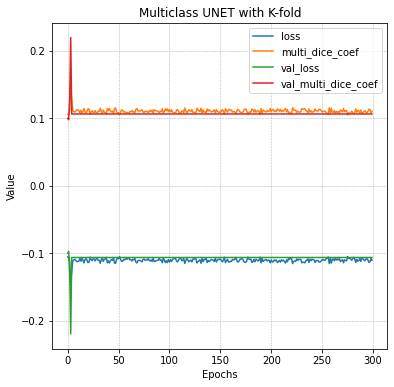

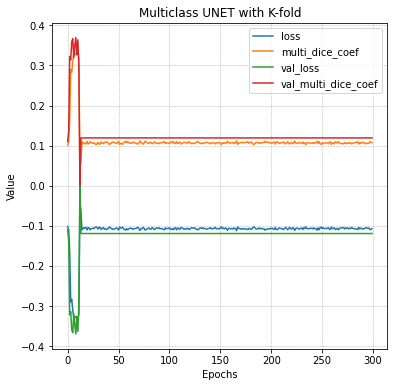

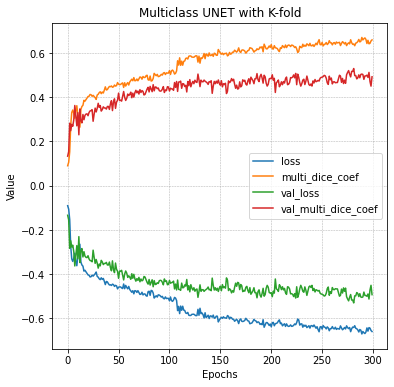

In [5]:
# Plot parameters
size_x = 6
size_y = 6
title = 'Multiclass UNET with K-fold'
x_label = 'Epochs'
y_label = 'Value'
legend = True
print_keys = False

# Line plots of model history
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[0])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[1])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[2])

1/1 [==============================] - 10s 10s/step

Shape and Unique values of prediction :
 (768, 768, 3) 
 [0.0000000e+00 1.1756252e-38 1.1765585e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


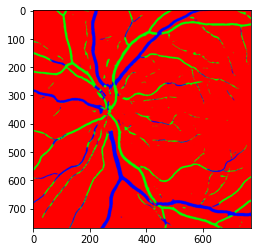

In [6]:
# Read and load test images for prediction
test_image_list = get_file_list(test_dir, '')
x_test = load_as_multiclass(test_image_list, img_w, img_h, img_c, 'image')

# Predict test images
predicted_mask_list = model.predict(x_test)

# Debugging information
get_image_information(predicted_mask_list, img_w, img_h, 'prediction', loaded = True)

1  out of  19  converted
2  out of  19  converted
3  out of  19  converted
4  out of  19  converted
5  out of  19  converted
6  out of  19  converted
7  out of  19  converted
8  out of  19  converted
9  out of  19  converted
10  out of  19  converted
11  out of  19  converted
12  out of  19  converted
13  out of  19  converted
14  out of  19  converted
15  out of  19  converted
16  out of  19  converted
17  out of  19  converted
18  out of  19  converted
19  out of  19  converted

Shape and Unique values of prediction mask :
 (768, 768) 
 [  0 128 255]


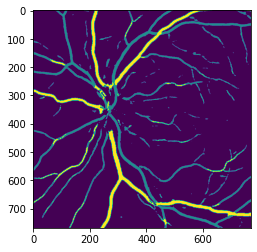

In [7]:
# Save predicted images to folder
save_multiclass_predictions(predicted_mask_list[0:len(predicted_mask_list)])

# Debugging information
prediction_list = get_file_list('/tf/ravir-challenge/predictions', '')
get_image_information(prediction_list, img_w, img_h, 'prediction mask', loaded = False)